# **CONVOLUTIONAL NEURAL NETWORK**

* ## **On Mnist Dataset**

In [ ]:
import keras
from keras.datasets import mnist

import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28,28,1) #28x28 matrix and 1 shows number of channels(grayscale)

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, InputLayer

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = input_shape))
model.add(Conv2D(25, (5,5), activation = 'relu', strides=(1,1), padding='same')) #we need to tell about filter in this layer(no of filters, filters size, activation, stride, padding)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) # it will convert matrix to vector
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 25)          │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4900)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          49,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,660 (193.98 KB)

 Trainable params: 49,660 (193.98 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
histoy = model.fit(x_train, y_train, batch_size = 10, epochs = 50, validation_data=(x_test, y_test))

Epoch 1/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 73s 12ms/step - accuracy: 0.9589 - loss: 0.1503 - val_accuracy: 0.9572 - val_loss: 0.1604
Epoch 2/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 96s 14ms/step - accuracy: 0.9690 - loss: 0.1145 - val_accuracy: 0.9674 - val_loss: 0.1380
Epoch 3/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 124s 11ms/step - accuracy: 0.9735 - loss: 0.0962 - val_accuracy: 0.9639 - val_loss: 0.1422
Epoch 4/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 77s 11ms/step - accuracy: 0.9766 - loss: 0.0929 - val_accuracy: 0.9689 - val_loss: 0.1656
Epoch 5/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 77s 10ms/step - accuracy: 0.9797 - loss: 0.0838 - val_accuracy: 0.9703 - val_loss: 0.1488
Epoch 6/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - accuracy: 0.9813 - loss: 0.0742 - val_accuracy: 0.9688 - val_loss: 0.1982
Epoch 7/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 58s 10ms/step - accuracy: 0.9828 - loss: 0.0742 - val_accuracy: 0.9678 - val_loss: 0.2212
Epoch 8/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 58s 10ms/step - accuracy: 0.9840 

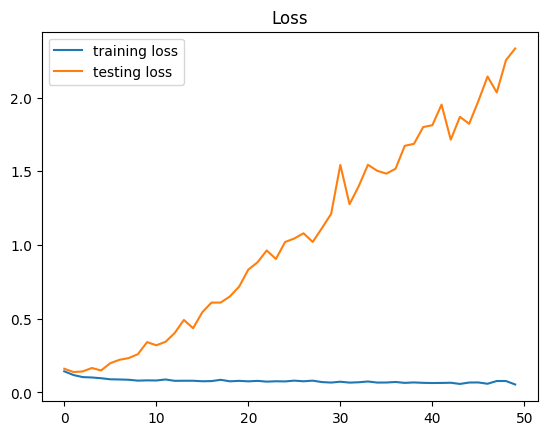

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(histoy.history['loss'], label = 'training loss')
plt.plot(histoy.history['val_loss'], label = 'testing loss')
plt.legend()
plt.show()

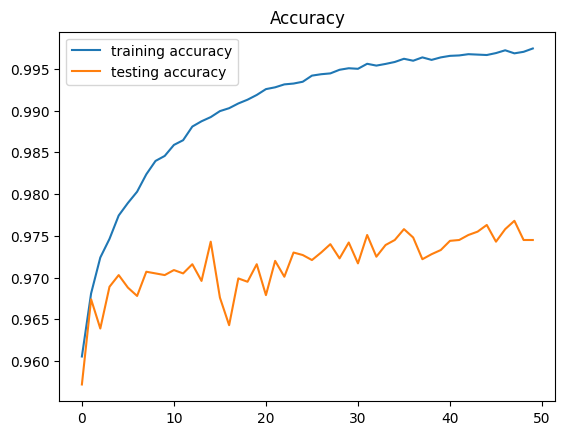

In [ ]:
plt.title('Accuracy')
plt.plot(histoy.history['accuracy'], label = 'training accuracy')
plt.plot(histoy.history['val_accuracy'], label = 'testing accuracy')
plt.legend()
plt.show()